In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("delivery_time.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<ipython-input-5-17c729220bf7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

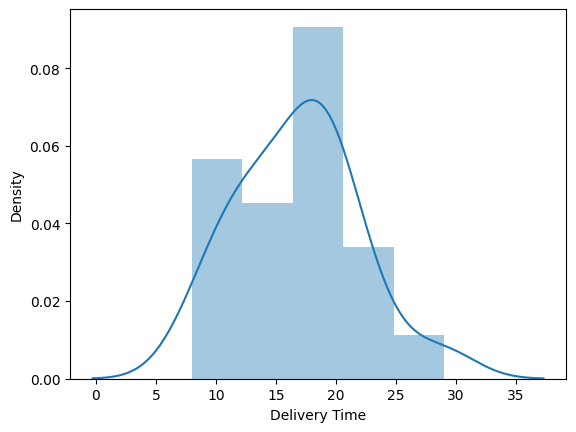

In [5]:
sns.distplot(df['Delivery Time'])

<ipython-input-6-7b95df57ee4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

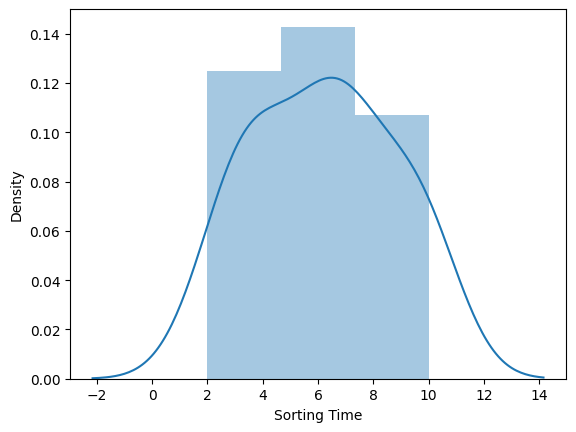

In [6]:
sns.distplot(df['Sorting Time'])

In [7]:
df =df.rename({'Delivery Time' : 'Delivery_Time', 'Sorting Time' : 'Sorting_Time'}, axis=1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
model = smf.ols('Delivery_Time~Sorting_Time', data=df).fit()

In [9]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [10]:
model.pvalues, model.tvalues

(Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64,
 Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64)

In [11]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [12]:
newdata = pd.Series([5,8])
newdata

0    5
1    8
dtype: int64

In [13]:
data_pred = pd.DataFrame(newdata, columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,5
1,8


In [14]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64